In [1]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,layers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

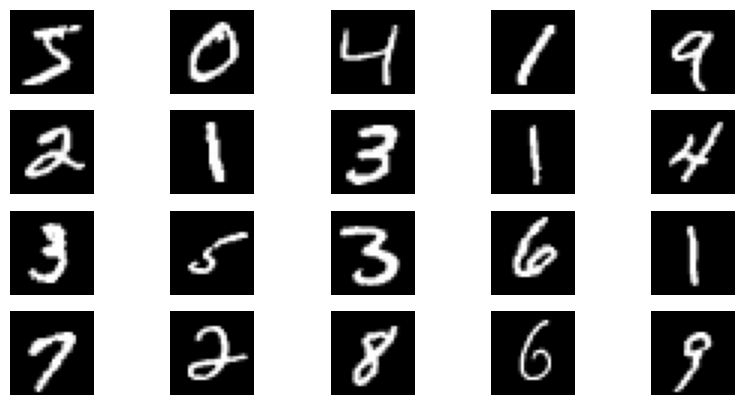

In [5]:
x_train_plot = x_train.reshape(-1, 28, 28)

plt.figure(figsize=(10, 5))

for i in range(20):
  plt.subplot(4, 5, i+1)
  plt.imshow(x_train_plot[i], cmap = 'gray')
  plt.axis('off')

plt.show()

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=42)

In [7]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000,)
(12000,)


In [8]:
num_samples_train = 10000
num_samples_val = 4000
x_train_subset = np.random.choice(x_train.shape[0], num_samples_train, replace=False)
x_val_subset = np.random.choice(x_val.shape[0], num_samples_val, replace=False)

In [9]:
print(x_train_subset.shape)
print(x_val_subset.shape)

(10000,)
(4000,)


In [10]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3,3), activation='relu'))
model1.add(layers.Conv2D(64, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(x_train[x_train_subset], y_train[x_train_subset], epochs=10, validation_data=(x_val[x_val_subset], y_val[x_val_subset]))

avg_train_subset_accuracy = np.mean(history1.history['accuracy'])
avg_val_subset_accuracy = np.mean(history1.history['val_accuracy'])

print('Average Subset Training Accuracy:', avg_train_subset_accuracy)
print('Average Subset Validation Accuracy:', avg_val_subset_accuracy)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7619 - loss: 0.7477 - val_accuracy: 0.9643 - val_loss: 0.1210
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9636 - loss: 0.1158 - val_accuracy: 0.9768 - val_loss: 0.0823
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9809 - loss: 0.0614 - val_accuracy: 0.9705 - val_loss: 0.0917
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9884 - loss: 0.0359 - val_accuracy: 0.9762 - val_loss: 0.0783
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9918 - loss: 0.0277 - val_accuracy: 0.9755 - val_loss: 0.0807
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9919 - loss: 0.0259 - val_accuracy: 0.9795 - val_loss: 0.0856
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9929 - loss: 0.0250 - val_accuracy: 0.9785 - val_loss: 0.0751
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9937 - loss: 0.0161 - val_accuracy: 

###Now training the model over the entire dataset

In [11]:
history_entire_model = model1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

avg_train_accuracy = np.mean(history_entire_model.history['accuracy'])
avg_val_accuracy = np.mean(history_entire_model.history['val_accuracy'])

print('Average Training Accuracy:', avg_train_accuracy)
print('Average Validation Accuracy:', avg_val_accuracy)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9851 - loss: 0.0533 - val_accuracy: 0.9874 - val_loss: 0.0392
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9934 - loss: 0.0229 - val_accuracy: 0.9868 - val_loss: 0.0427
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9948 - loss: 0.0172 - val_accuracy: 0.9877 - val_loss: 0.0419
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9957 - loss: 0.0146 - val_accuracy: 0.9911 - val_loss: 0.0329
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9960 - loss: 0.0119 - val_accuracy: 0.9908 - val_loss: 0.0316
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9975 - loss: 0.0080 - val_accuracy: 0.9874 - val_loss: 0.0582
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9959 - loss: 0.0117 - val_accuracy: 0.9903 - val_loss: 0.0483
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9965 - loss: 0.0102 

In [12]:
y_pred = model1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [13]:
y_pred.shape

(10000, 10)

In [14]:
y_pred_class = np.argmax(y_pred, axis = 1)

In [15]:
y_pred_class.shape

(10000,)

In [16]:
accuracy = accuracy_score(y_test, y_pred_class)
print('Accuracy:', accuracy)

Accuracy: 0.9908


###Visualizing the predictions using Matplotlib

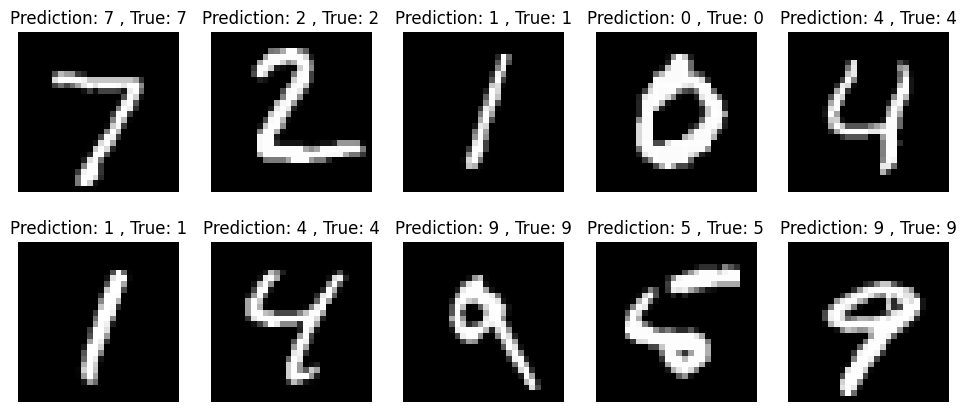

In [17]:
plt.figure(figsize=(12, 5))

for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title(f'Prediction: {y_pred_class[i]} , True: {y_test[i]}')
  plt.axis('off')
plt.show()

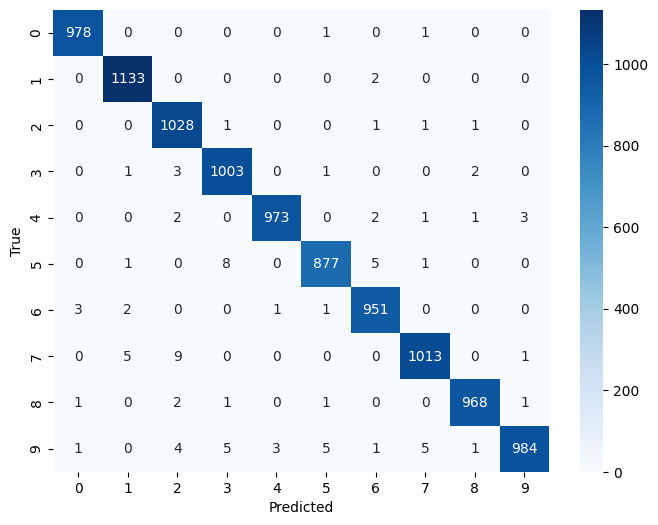

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



##Since real world data are not this clean, now we will try to introduce some noise in the dataset and train the model on that dataset to make the model more robust

###Since we are using a noisy data, it is better to use an APL network

In [20]:
# Defining Passive Loss Function

import tensorflow as tf
from tensorflow.keras import backend as K

class ReverseCrossEntropy(tf.keras.losses.Loss):
  def __init__(self, num_class = 10, name = 'reverse_cross_entropy'):
    super().__init__(name=name)
    self.num_class = num_class
    self.epsilon = 1e-7

  def call(self, y_true, y_pred):
    y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth= self.num_class)
    y_pred = tf.clip_by_value(y_pred, self.epsilon, 1.0)
    return -K.sum((1- y_true) * K.log(1 - y_pred), axis = 1)


In [21]:
class APLFramework(tf.keras.losses.Loss):
  def __init__(self, alpha = 0.5, beta = 0.5, name = 'APL_Framework'):
    super().__init__(name=name)
    self.alpha = alpha
    self.beta = beta
    self.active_loss = tf.keras.losses.SparseCategoricalCrossentropy()
    self.reverse_loss = ReverseCrossEntropy()

  def call(self, y_true, y_pred):
    active_loss = self.alpha * self.active_loss(y_true, y_pred)
    reverse_loss = self.beta * self.reverse_loss(y_true, y_pred)
    return active_loss + reverse_loss

####Introducing noise in the dataset and comparing vanilla loss function with APL loss function

In [22]:
noise_fraction = np.linspace(0.1, 0.8, num = 7)
vanilla_accu = []
api_accu = []

for noise in noise_fraction:
  print(f'Noise fraction: {noise}')
  noisy_y_train = np.copy(y_train)
  num_samples = int(noise * len(noisy_y_train))
  indices = np.random.choice(len(noisy_y_train), num_samples, replace = False)

  for i in indices:
    original_label = y_train[i]
    new_label = np.random.randint(0, 10)
    while new_label == original_label:
      new_label = np.random.randint(0, 10)
    noisy_y_train[i] = new_label

  vanilla_model = models.clone_model(model1)
  vanilla_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  vanilla_history = vanilla_model.fit(x_train, noisy_y_train, epochs=10, validation_data=(x_val, y_val))

  api_model = models.clone_model(model1)
  api_model.compile(optimizer='adam', loss=APLFramework(), metrics=['accuracy'])
  api_history = api_model.fit(x_train, noisy_y_train, epochs=10, validation_data=(x_val, y_val))

  avg_val_acc_vanilla = np.mean(vanilla_history.history['val_accuracy'])
  avg_val_acc_api = np.mean(api_history.history['val_accuracy'])

  vanilla_accu.append(avg_val_acc_vanilla)
  api_accu.append(avg_val_acc_api)

  print(f'Vanilla val accuracy: {avg_val_acc_vanilla:.4f}, APL val accuracy: {avg_val_acc_api:.4f}')

Noise fraction: 0.1
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7974 - loss: 0.8883 - val_accuracy: 0.9822 - val_loss: 0.2037
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8859 - loss: 0.6233 - val_accuracy: 0.9860 - val_loss: 0.1846
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8897 - loss: 0.5967 - val_accuracy: 0.9893 - val_loss: 0.1501
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8934 - loss: 0.5716 - val_accuracy: 0.9887 - val_loss: 0.1433
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8937 - loss: 0.5605 - val_accuracy: 0.9879 - val_loss: 0.2025
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8965 - loss: 0.5318 - val_accuracy: 0.9882 - val_loss: 0.1217
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8948 - loss: 0.5194 - val_accuracy: 0.9872 - val_loss: 0.1615
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0

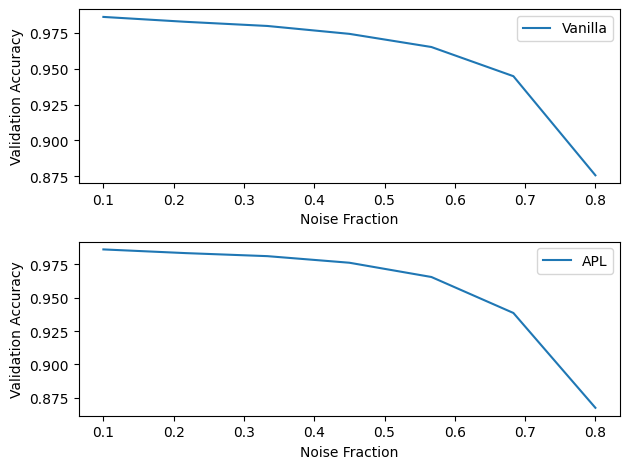

In [23]:
plt.subplot(2, 1, 1)
plt.plot(noise_fraction, vanilla_accu, label='Vanilla')
plt.xlabel('Noise Fraction')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(noise_fraction, api_accu, label='APL')
plt.xlabel('Noise Fraction')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
print(vanilla_accu)
print(api_accu)

[np.float64(0.9861249923706055), np.float64(0.9827249944210052), np.float64(0.9798166751861572), np.float64(0.974316668510437), np.float64(0.9651499927043915), np.float64(0.9448083400726318), np.float64(0.875724995136261)]
[np.float64(0.9863250017166137), np.float64(0.9835583329200744), np.float64(0.9812666654586792), np.float64(0.9763166666030884), np.float64(0.9656000077724457), np.float64(0.9385583341121674), np.float64(0.8672833323478699)]


####We can see that as noise increases, the APL loss function tend to have better accuracy than vanilla loss function.

### We are getting for noise fraction = 0.217, the APL loss function has slightly better accuracy than vanilla loss function.

In [25]:
final_noise_fraction = 0.217
final_num_noise = int(final_noise_fraction * len(y_train))
final_noisy_y_train = np.copy(y_train)

final_indices = np.random.choice(len(final_noisy_y_train), final_num_noise, replace = False)

for i in final_indices:
  original_label = y_train[i]
  new_label = np.random.choice([label for label in range(10) if label != original_label])
  final_noisy_y_train[i] = new_label


In [26]:
final_model = models.clone_model(model1)
final_model.compile(optimizer='adam', loss=APLFramework(), metrics=['accuracy'])

final_history = final_model.fit(x_train, final_noisy_y_train, epochs=10, validation_data=(x_val, y_val))

avg_final_train_accuracy = np.mean(history_entire_model.history['accuracy'])
avg_final_val_accuracy = np.mean(history_entire_model.history['val_accuracy'])

print('Average Training Accuracy:', avg_final_train_accuracy)
print('Average Validation Accuracy:', avg_final_val_accuracy)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6908 - loss: 0.9735 - val_accuracy: 0.9818 - val_loss: 0.2692
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.7704 - loss: 0.8296 - val_accuracy: 0.9820 - val_loss: 0.3069
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7734 - loss: 0.8095 - val_accuracy: 0.9868 - val_loss: 0.2530
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7698 - loss: 0.8097 - val_accuracy: 0.9873 - val_loss: 0.3156
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7763 - loss: 0.7844 - val_accuracy: 0.9867 - val_loss: 0.3101
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7793 - loss: 0.7688 - val_accuracy: 0.9872 - val_loss: 0.2429
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7770 - loss: 0.7588 - val_accuracy: 0.9874 - val_loss: 0.2338
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7821 - loss: 0.728

In [27]:
y_pred = final_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [28]:
y_pred.shape

(10000, 10)

In [29]:
y_pred_class = np.argmax(y_pred, axis = 1)

In [30]:
y_pred_class.shape

(10000,)

In [31]:
accuracy = accuracy_score(y_test, y_pred_class)
print('Accuracy:', accuracy)

Accuracy: 0.976


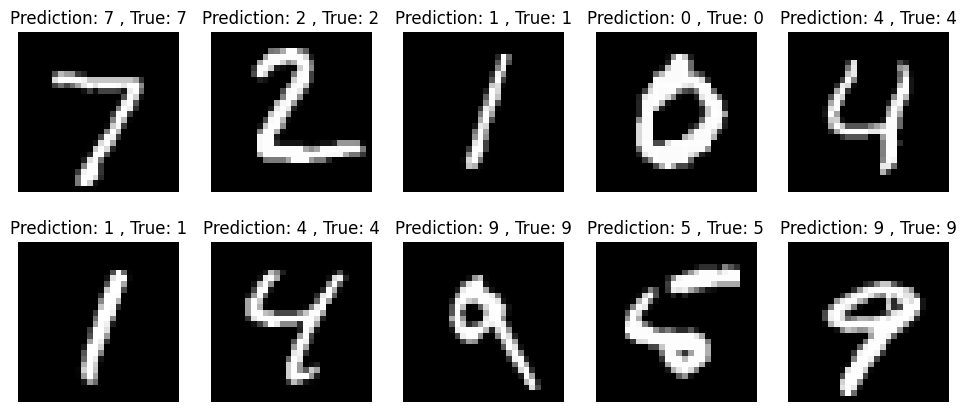

In [32]:
plt.figure(figsize=(12, 5))

for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title(f'Prediction: {y_pred_class[i]} , True: {y_test[i]}')
  plt.axis('off')
plt.show()

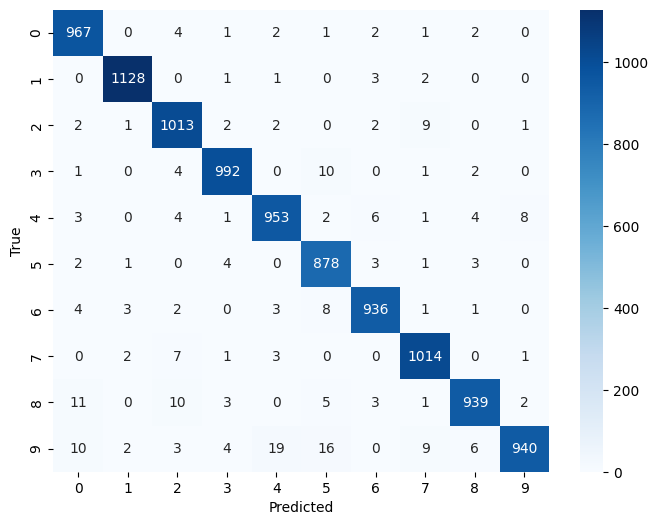

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.97      0.97       982
           5       0.95      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.99      0.93      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

